# waves

In [26]:
#import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.fftpack
import pandas as pd

**main variables**
<br> f - main frequency (Hz)
<br> frangemax - x axis length of Fourier-transform
<br> samples - sample points of the first graph
<br> randsize - size of noise (random noise)

In [5]:
f=200
frangemax=400
samples=2000
randsize=5

x = np.linspace(0.0, 1, samples)
sin = np.sin(f*2*np.pi*x)
rand = np.random.rand(samples)*randsize
s=(sin+rand-(randsize/2))/(0.5*randsize+1)

In [6]:
import ipywidgets as widgets
view=widgets.FloatSlider()
display(view)

FloatSlider(value=0.0)

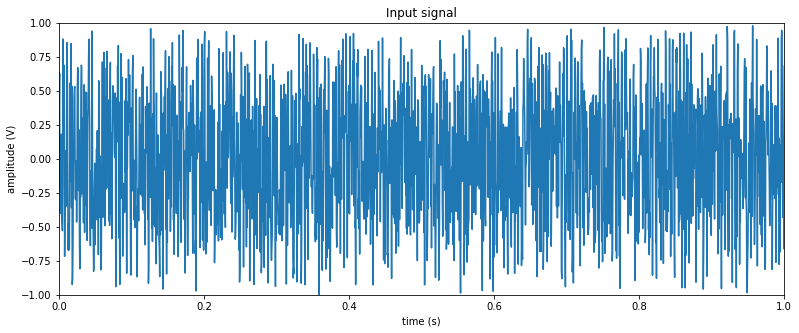

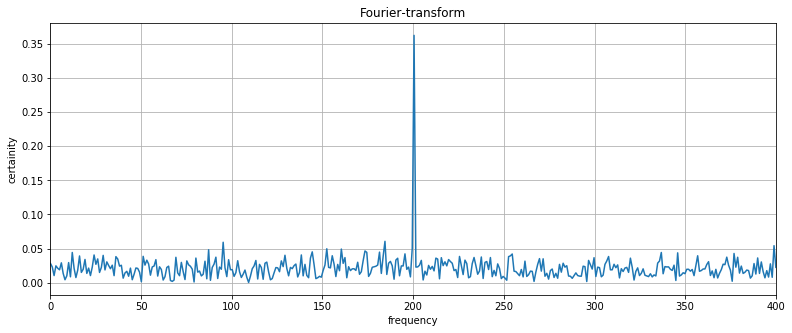

In [7]:
plt.figure(figsize=(13,5))
plt.title('Input signal')
plt.plot(x,s)
yaxismax=1/2**(view.value/12)
plt.axis([0,yaxismax,-1,1])
plt.ylabel('amplitude (V)')
plt.xlabel('time (s)')
plt.show()

yf = scipy.fftpack.fft(s)
xf = np.linspace(0.0, frangemax, frangemax)
nyquist=samples/2

plt.figure(figsize=(13,5))
plt.plot(xf,1/frangemax/2*np.abs(yf[:frangemax]))
#plt.axis([0,frangemax,0,1.5/rs])
plt.xlim((0,frangemax))
plt.xlabel('frequency')
plt.ylabel('certainity')
#plt.xscale('log')
plt.title('Fourier-transform')
plt.grid(True)
plt.show()

In [28]:
print (np.average(np.abs(yf)))
yfabs=[]
for j in range(frangemax):
    yfabs.append(np.abs(yf[j]))
#print (yfabs)
yfsort=np.sort(yfabs,axis=None)
#print(yfsort)
fout=[0,0,0,0,0]
yfmaxsum=0
for i in range(5):
    yfmaxsum=yfmaxsum+yfsort[frangemax-i-1]
    for j in range(frangemax):
        if yfsort[frangemax-i-1] == yfabs[j]:
            fout[i]=j
    print (fout[i],"  ",yfabs[i])
print (np.max(np.abs(yf)))

d = {'col1': [fout], 'col2': [yfabs]}
df = pd.DataFrame(data=d)
df

16.898331653198053
200    22.662970516203835
184    18.448493585583442
95    8.432769028409618
398    19.817305721569767
199    17.00666712350386
289.8232008671977


,col1,col2
0,"[200, 184, 95, 398, 199]","[22.662970516203835, 18.448493585583442, 8.432..."
